Colab에서 GPU 연산 사용
~> 메뉴 > 수정 > 노트 설정 > 하드웨어 가속기 > GPU


Tensorflow를 사용한 MNIST 데이터 분류 예측 

In [1]:
# Tensorflow 버전 선택
%tensorflow_version 2.x

# Tensorflow 버전과 GPU 사용 여부 확인
import tensorflow as tf

print(tf.__version__)
print(tf.test.gpu_device_name())

TensorFlow 2.x selected.
2.1.0-rc1
/device:GPU:0


In [0]:
# 클래스와 모듈 import
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# EarlyStopping ~> 모델 최적화 
# epoch를 반복할 때, 일정 epoch 동안 성능 향상이 없으면, 자동으로 학습 중단(epoch 중단)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# MNIST 데이터 load, 확인
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}')

X_train shape: (60000, 28, 28), Y_train shape: (60000,)
X_test shape: (10000, 28, 28), Y_test shape: (10000,)


In [4]:
# MNIST 데이터를 CNN의 입력 데이터로 사용할 수 있도록 shape 변환

# X_train, X_test = (samples, h, w, 1) 
# ~> samples: 데이터 개수, h: height, w:width
n, h, w = X_train.shape 
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

print('X_train reshape: ', X_train.shape)
print('X_test reshape: ', X_test.shape)

# Y_train, Y_test ~> one_hot_encoding
Y_train = to_categorical(Y_train, 10, dtype='float16') 
Y_test = to_categorical(Y_test, 10, dtype='float16')

print('Y_train[0]: ', Y_train[0])
print('Y_test[0]: ', Y_test[0])

X_train reshape:  (60000, 28, 28, 1)
X_test reshape:  (10000, 28, 28, 1)
Y_train[0]:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Y_test[0]:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
# 이미지 데이터는 0~255 사이의 값들로 저장되어 있다. 
# 신경망에 보낼 때는 정규화된 값 (0. ~ 1.) 으로 보내면 더 좋은 성능 기대 가능

# X_train, X_test를 0 ~ 1 사이의 값으로 정규화
X_train = X_train.astype('float16') / 255
X_test = X_test.astype('float16') / 255

In [0]:
# 신경망 모델 생성 -> Sequential 클래스 객체(인스턴스) 생성
model = Sequential()

In [0]:
# 교재 P.250 그림 7-23 참고

# 신경망 모델에 hidden_layer, output_layer 추가
# 구성: Conv2D -> MaxPool2D -> Flatten -> Dense -> Dense(output_layer)
# Conv2D의 활성화 함수는 'ReLU'
# Dense의 활성화 함수는 'ReLU(hidden_layer)', 'Softmax(output_layer)'

model.add(Conv2D(filters=32, # filter 개수
                 kernel_size=(3, 3), # filter의 height, width
                 activation='relu',  # 활성화 함수
                 input_shape=(28, 28, 1))) # 입력 데이터 shape

model.add(MaxPool2D(pool_size=2)) # pooling window의 height, width와 stride를 모두 2로

# Affine에 적용 위해 flatten()
model.add(Flatten())

# Fully-Connection hidden_layer
model.add(Dense(128, # hidden_layer의 뉴런 수
                activation='relu')) # 활성화 함수

# Output_layer
model.add(Dense(10, 
                activation='softmax'))

In [0]:
# 신경망 모델 컴파일
model.compile(loss='categorical_crossentropy', # 분류 문제이므로 loss는 카테고리
              optimizer='adam', # 파라미터 최적화 알고리즘
              metrics=['accuracy']) # 성과의 지표

In [15]:
# patience(일정 epoch)동안 loss의 변화가 없으면(성능 향상이 없으면) 자동으로 stop
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

# 신경망 학습 진행
history = model.fit(X_train, Y_train, # 학습할 데이터
                    batch_size=200, epochs=50, # batch_size와 학습 반복 횟수
                    verbose=1, # 학습 중 출력되는 문구
                    callbacks=[early_stop], # 학습 과정과 변화 모니터링
                    validation_data=(X_test, Y_test)) # 학습 결과를 평가할 데이터 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2700 - accuracy: 0.9228 - val_loss: 0.1085 - val_accuracy: 0.9676
Epoch 2/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0819 - accuracy: 0.9757 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 3/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0524 - val_accuracy: 0.9825
Epoch 4/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0491 - val_accuracy: 0.9825
Epoch 5/50
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.0453 - val_accuracy: 0.9843
Epoch 6/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.0409 - val_accuracy: 0.9855
Epoch 7/50
60000/60000 [==============================]

In [17]:
# 테스트 데이터로 모델 학습 평가 -> loss, accuracy
eval = model.evaluate(X_test, Y_test)
print(f'Test Loss: {eval[0]}, Test Accuracy: {eval[1]}')

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0600 - accuracy: 0.9852
Test Loss: 0.05997641257862463, Test Accuracy: 0.9851999878883362


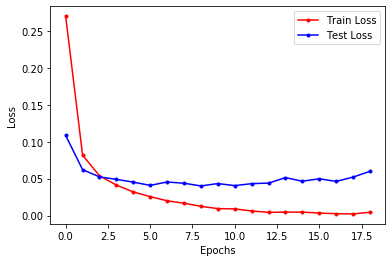

In [18]:
# 학습 데이터와 테스트 데이터의 Loss 그래프 

# 학습 데이터 셋의 Loss
train_loss = history.history['loss']

# 테스트 데이터 셋의 Loss
test_loss = history.history['val_loss']

x = range(len(train_loss))
plt.plot(x, train_loss, marker='.', color='red', label='Train Loss')
plt.plot(x, test_loss, marker='.', color='blue', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

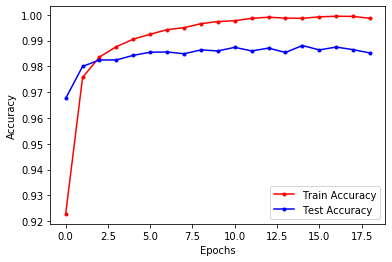

In [20]:
# 학습 데이터와 테스트 데이터의 Accuracy 그래프

# 학습 데이터의 Accuracy
train_acc = history.history['accuracy']

# 테스트 데이터의 Accuracy
test_acc = history.history['val_accuracy']

x = range(len(train_acc))
plt.plot(x, train_acc, marker='.', color='red', label='Train Accuracy')
plt.plot(x, test_acc, marker='.', color='blue', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()